In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

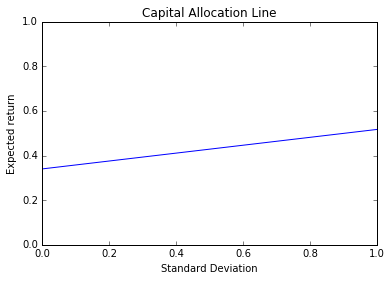

In [11]:
X = np.linspace(0,1)
def fx(x):
    return 0.1769*x+0.34
plt.plot(X,fx(X))
plt.ylabel('Expected return')
plt.xlabel('Standard Deviation')
plt.ylim(0,1)
plt.title('Capital Allocation Line')
plt.savefig('FE312_HW2_graph1.png')

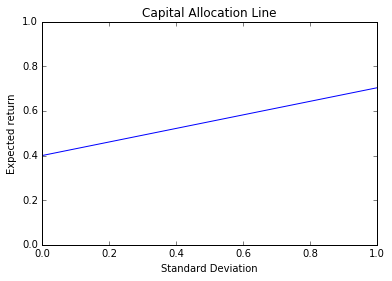

In [12]:
def f2(x):
    return 0.3035*x+0.40
plt.plot(X,f2(X))
plt.ylabel('Expected return')
plt.xlabel('Standard Deviation')
plt.ylim(0,1)
plt.title('Capital Allocation Line')
plt.savefig('FE312_HW2_graph2.png')

In [9]:
np.random.normal()

-2.4550563923446327

In [63]:
trials = []
for i in range(10000):
    trial = []
    for j in range(100):
        trial.append([0.1+0.2*np.random.normal(),0.1+0.2*np.random.normal()])
    trials.append(trial)

In [28]:
from scipy.optimize import minimize
sigma = 0.2

In [68]:
buy_and_hold = []
realloc = []
weights = []
for i in trials:
    weight = [[0.5,0.5]]
    re = []
    hold = []
    for n,j in enumerate(i):
        r1 = (weight[0][0]*(j[0]) + weight[0][1]*(j[1]))
        r2 = (weight[n][0]*(j[0]) + weight[n][1]*(j[1]))
        re.append(r1)
        hold.append(r2)
        # Original weight times 1+return gives new weight (out of original total)
        w1 = float(weight[n][0]*(1+j[0]))/(1+r2)
        w2 = float(weight[n][1]*(1+j[1]))/(1+r2)
        weight.append([w1,w2])
    buy_and_hold.append(hold)
    realloc.append(re)
    weights.append(weight)

In [69]:
sharpe1 = np.array(map(lambda x:np.mean(x),buy_and_hold))/np.array(map(lambda x:np.std(x),buy_and_hold))
sharpe2 = np.array(map(lambda x:np.mean(x),realloc))/np.array(map(lambda x:np.std(x),realloc))

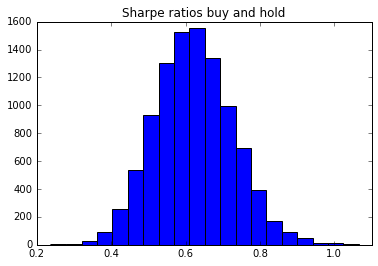

In [70]:
plt.hist(sharpe1,bins=20)
plt.title('Sharpe ratios buy and hold')
plt.savefig('FE312_HW2_graph3.png')

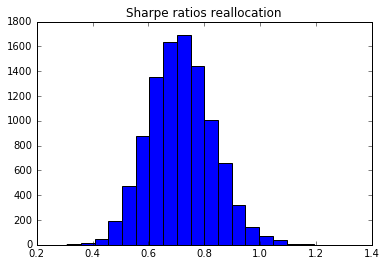

In [71]:
plt.hist(sharpe2,bins=20)
plt.title('Sharpe ratios reallocation')
plt.savefig('FE312_HW2_graph4.png')

In [80]:
weights2 = map(lambda x: map(lambda y:y[0],x), weights)

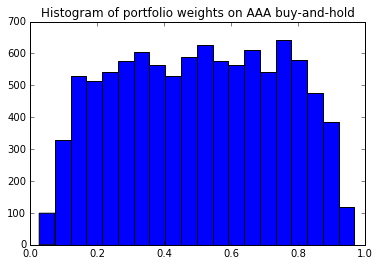

In [81]:
plt.hist(map(lambda x:np.mean(x),weights2),bins=20)
plt.title('Histogram of portfolio weights on AAA buy-and-hold')
plt.savefig('FE312_HW2_graph5.png')